A partir de los datos de iris:

Ejercicio 1:

- Carga los datos originales
- Utiliza PCA para reducir la dimensionalidad de los datos. No reemplaces X con el resultado, crea una nueva X_pca. Utiliza PCA(2) y otra con PCA(3)
- Utiliza Kmeans para agrupar y predecir las clases de los nuevos datos.
- Compara los resultados para PCA(2) y PCA(3) con las clases originales (y_real).
- ¿Es mejor PCA(2) o PCA(3)?

Ejercicio 2: 

- Repite el proceso con T-SNE y DBSCAN. ¿Cuál da mejores resultados?


In [68]:
iris = datasets.load_iris()
X = iris.data

In [1]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()
X = iris.data
# al aplicar PCA se asume que los datos de trabajo tienen una distribución gaussiana o normal.  Por tanto, aplicamos a los datos una transformación de normalización de forma que su media sea igual a 0, y su varianza =1. Para ello, utilizamos la transformación Standardscaler de sklearn.
X = StandardScaler().fit_transform(X)
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [2]:
import pandas as pd
# Creamos el dataframe
df = pd.DataFrame(data=iris.data, columns=iris.get("feature_names"))


In [3]:
from sklearn.decomposition import PCA

### 1.2 componentes principales

In [4]:
# Establecemos el número de componentes que queremos obtener a partir de las variables que tenemos en nuestro dataFrame

pca = PCA(n_components=2)

In [5]:
# Fijamos el modelo para las variables predictoras de la muestra de entrenamiento
pca.fit(X_train)

PCA(n_components=2)

In [6]:
# Hallamos la varianza explicativa de la mejor proyección de nuestro PCA. El primer valor es la varianza explicativa de nuestro modelo con la muestra de entrenamiento
pca.explained_variance_ratio_

array([0.71537436, 0.24083209])

In [15]:
# la suma de los porcentajes de la varianza explicativa ha de ser cercano a 1
sum(pca.explained_variance_ratio_)


0.9675835168117097

In [7]:
# transformamos nuestras variables predictoras según nuestro modelo en dos componentes principales
# se obtiene el valor que toma cada componente para cada observación en función de las variables originales  

X_pca_2_train = pca.transform(X_train)

In [8]:
# Pasamos a dataframe la base con las columnas transformadas con los componentes principales
pca_2 = pd.DataFrame(data=X_pca_2_train)


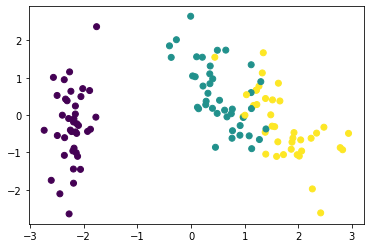

In [18]:
# obtenemos el gráfico de los dos componentes principales diferenciando con colores cada uno de los componentes
import matplotlib.pyplot as plt
plt.scatter(X_pca_2[:, 0], X_pca_2[:, 1], c=y_train)

In [19]:
# comprobamos la generalización del modelo aplicándolo a la muestra de test

# Fijamos el modelo para las variables predictoras de la muestra de test
pca.fit(X_test)

PCA(n_components=2)

In [20]:
# Hallamos la varianza explicativa de la mejor proyección de nuestro PCA. El primer valor es la varianza explicativa de nuestro modelo con la muestra de test
pca.explained_variance_ratio_

array([0.7900007 , 0.17758282])

In [21]:
sum(pca.explained_variance_ratio_)


0.9675835168117097

### 3 componentes principales

In [26]:
pca = PCA(n_components=3)

In [27]:
pca.fit(X_train)

PCA(n_components=3)

In [28]:
# No se observa incremento de varianza explicativa respecto a 2 componentes así que con dos componentes principales sería suficiente 
pca.explained_variance_ratio_

array([0.71537436, 0.24083209, 0.03901736])

In [29]:
# la suma de los porcentajes de la varianza explicativa ha de ser cercano a 1
sum(pca.explained_variance_ratio_)

0.9952238120965999

In [30]:
  X_pca_3_train = pca.transform(X_train)

In [31]:
pca_3 = pd.DataFrame(data=X_pca_3_train)


In [32]:
X_pca_3 = pca.fit_transform(X_train)

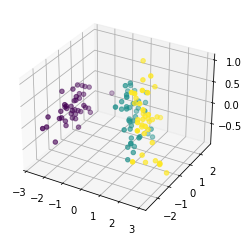

In [34]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import random

fig = pyplot.figure()
#ax = Axes3D(fig)
ax = fig.add_subplot(111, projection='3d')  # QUE SIGNIFICA EL 111???
ax.scatter(pca_3[0], pca_3[1], pca_3[2], c=y_train)
#pyplot.show()

In [35]:
pca.fit(X_test)

PCA(n_components=3)

In [36]:
pca.explained_variance_ratio_

array([0.7900007 , 0.17758282, 0.02604515])

In [37]:
sum(pca.explained_variance_ratio_)

0.9936286618153898

### 1.3. Kmeans

In [44]:
# identificamos cuál puede ser el número de clústers óptimo obteniendo las inercias en un rango
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_pca_2_train)
                for k in range(1, 20)]
inertias = [model.inertia_ for model in kmeans_per_k]

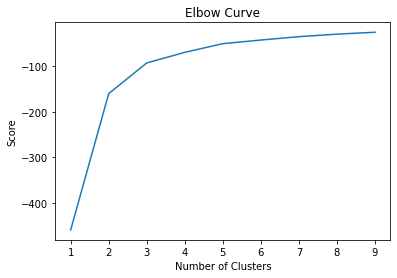

In [46]:
# Identificamos el número de clústers más adecuado viendo en una gráfica cual puede ser el elbow (codo). El número de clústers a partir del cual ya no aumenta de forma importante el score

Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X_pca_2_train).score(X_pca_2_train) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [43]:
# Se considera que el número de clústers adecuado puede ser 5
# Utilizamos para hallar los clústers las variables predictoras transformadas con PCA (X_pca_2_train)

from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters=5, random_state=0).fit(X_pca_2_train)
print("\nkmeans.labels_:", kmeans.labels_)
y_predict = kmeans.fit_predict(X_pca_2_train)
print("predict:", y_predict)
clusters = kmeans.cluster_centers_
print("kmeans.cluster_centers_:\n", clusters)


kmeans.labels_: [1 4 0 1 1 0 0 1 1 4 0 0 0 4 4 3 0 2 0 2 0 2 0 1 2 3 1 1 4 3 0 1 1 1 3 1 0
 2 1 0 0 4 0 0 3 0 2 3 4 3 0 1 1 3 2 1 0 1 1 0 3 2 0 0 2 3 1 1 3 2 1 1 1 0
 2 1 2 2 1 0 0 0 2 2 4 2 0 2 3 3 0 3 0 3 4 0 2 2 4 3 2 2 1 2 1 2 2 0 0 2 3
 0 0 0 1 0 3 4 3 2]
predict: [1 4 0 1 1 0 0 1 1 4 0 0 0 4 4 3 0 2 0 2 0 2 0 1 2 3 1 1 4 3 0 1 1 1 3 1 0
 2 1 0 0 4 0 0 3 0 2 3 4 3 0 1 1 3 2 1 0 1 1 0 3 2 0 0 2 3 1 1 3 2 1 1 1 0
 2 1 2 2 1 0 0 0 2 2 4 2 0 2 3 3 0 3 0 3 4 0 2 2 4 3 2 2 1 2 1 2 2 0 0 2 3
 0 0 0 1 0 3 4 3 2]
kmeans.cluster_centers_:
 [[ 0.91452448  0.20030979]
 [-2.21670692  0.07573717]
 [ 1.9446455  -0.83606886]
 [ 0.1766458   1.50853499]
 [-2.25201281 -1.47783342]]


In [86]:
df_completo = pd.DataFrame(data= np.c_[iris['data'], iris['target']])


In [87]:
df_completo = df_completo.rename(columns = 
{0: 'sepal length (cm)', 
1: 'sepal width (cm)', 
2: 'petal length (cm)',
3: 'petal width (cm)', 
4:'Clase'})





## Me queda pendiente saber cuántos casos hay en cada clúster y como saber a qué clúster corresponde un caso nuevo aportando los valores de las columnas que se han incluido al identificar los clústers

### Comparar los resultados para PCA(2) y PCA(3) con las clases originales (y_real)

In [47]:
pca = PCA(n_components=2)

In [48]:
# fijamos el modelo para todos los valores
pca.fit(X)

PCA(n_components=2)

In [49]:
# varianza explicada para todos los valores
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

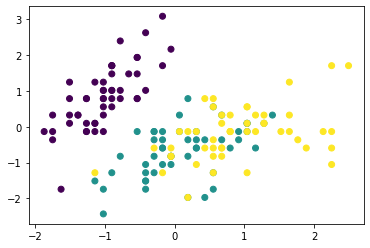

In [53]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y)

In [63]:
pca = PCA(n_components=3)

In [64]:
pca.fit(X)

PCA(n_components=3)

In [65]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922])

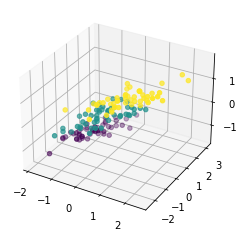

In [67]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import random

fig = pyplot.figure()
#ax = Axes3D(fig)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)
#pyplot.show()

## Repite el proceso con T-SNE y DBSCAN. ¿Cuál da mejores resultados?

## T_SNE. Equivale a PCA

In [99]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE


iris = datasets.load_iris()
X = iris.data
# al aplicar PCA se asume que los datos de trabajo tienen una distribución gaussiana o normal.  Por tanto, aplicamos a los datos una transformación de normalización de forma que su media sea igual a 0, y su varianza =1. Para ello, utilizamos la transformación Standardscaler de sklearn.
X = StandardScaler().fit_transform(X)
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [102]:
# Establecemos el modelo TSNE transformando los valores de X de entrenamiento
X_embedded = TSNE(n_components=2).fit_transform(X_train)
X_embedded.shape

(120, 2)

In [108]:
df2 = pd.DataFrame(data=X_embedded)

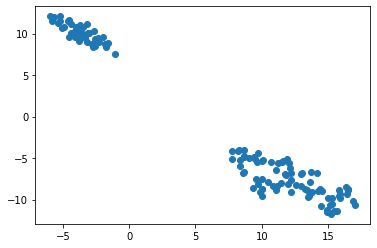

In [109]:
import matplotlib.pyplot as plt

plt.scatter(df2[0], df2[1])

# la separación entre observaciones es mejor con este modelo que con PCA

### Cómo obtengo el porcentaje de varianza explicada con T_SNE?

In [132]:
iris = datasets.load_iris()
X = iris.data

In [133]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()
X = iris.data
# al aplicar PCA se asume que los datos de trabajo tienen una distribución gaussiana o normal.  Por tanto, aplicamos a los datos una transformación de normalización de forma que su media sea igual a 0, y su varianza =1. Para ello, utilizamos la transformación Standardscaler de sklearn.
X = StandardScaler().fit_transform(X)
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [124]:
# Establecemos el modelo TSNE transformando los valores de X de entrenamiento
X_embedded = TSNE(n_components=3).fit_transform(X_train)
X_embedded.shape

(120, 3)

In [125]:
df3 = pd.DataFrame(data=X_embedded)

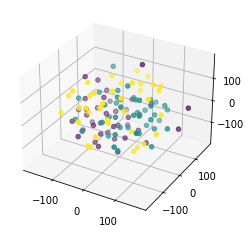

In [126]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import random

fig = pyplot.figure()
#ax = Axes3D(fig)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df3[0], df3[1], df3[2], c=y_train)
#pyplot.show()

## DBSCAN equivale a Kmeans

In [162]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler


In [172]:
# Establecemos el modelo de DBSCAN.Epsilos nos indica los clústers que estamos solicitando (2)
db = DBSCAN(eps=0.3, min_samples=2).fit(X_train)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
labels

array([-1, -1,  0,  1,  2, -1, -1,  1,  1, -1,  3, -1,  0,  4,  5,  6, -1,
        7,  0, -1,  8, -1,  9,  1, -1, -1,  1,  1, -1, -1, 10,  1, 11, -1,
        8,  1,  8, -1,  2,  0, -1, -1, 12,  3, -1,  9, 13, -1,  4, 14, 10,
        1,  1,  6, -1, 11, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, 15, 15,
       -1, -1,  2,  1, 15, -1, 13,  1, 16, -1,  2,  0, -1, 10, -1, -1, -1,
       16, -1, -1, -1, -1,  0, -1,  0, -1,  5,  8, -1, -1, -1, 14, -1, -1,
        1, -1, 11,  0, -1, -1,  8,  7, -1,  0, -1, 12,  1, -1, -1, -1, -1,
       -1], dtype=int64)

In [173]:
list(db.labels_).count(-1)

58

In [174]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 17
Estimated number of noise points: 58


In [175]:
# A clustering result satisfies homogeneity if all of its clusters contain only data points which are members of a single class.
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))

# A clustering result satisfies completeness if all the data points that are members of a given class are elements of the same cluster.
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))

# The V-measure is the harmonic mean between homogeneity and completeness:
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))


# The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample.
# To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of. 
# The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

ValueError: Found input variables with inconsistent numbers of samples: [750, 120]